#                              Insurance costs Clustering

### Roll No: 10
### UID:209011
### Name: Flemy Roy

About the dataset:

Columns:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Data Extraction

In [2]:
#dataset from Kaggle
data = pd.read_csv ("C:\\Users\\FLEMY\\Downloads\\insurance.csv")

In [3]:
#Checking head 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Preprocessing

Get Information about the type of data,its attributes and their data types

In [4]:
data.info()
df=data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking for Null Values in the data set

In [5]:
data.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


No null values

In [6]:
#Compute basic values about the continuous attributes
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1.The statistics look reasonable

2.The age column shows that the data refers to an adult population

3.The number of people with more than two children is very low

4.The charges look highly skewed less number of people will require expensive treatements relating to serious diseases

# Basic EDA

Text(0.5, 0, 'charges')

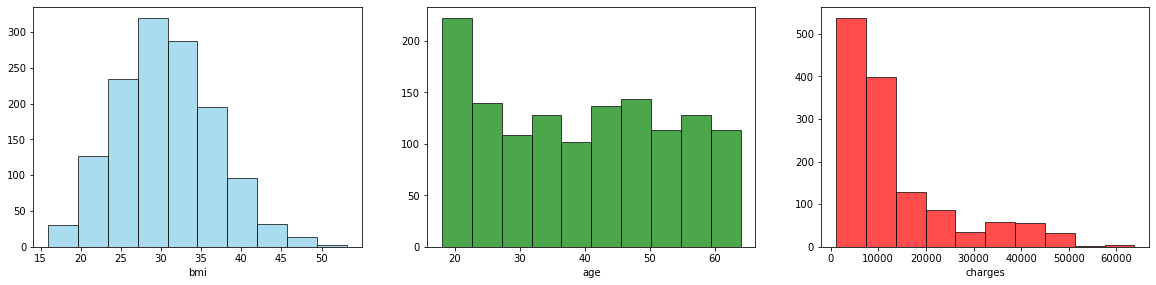

In [7]:
#Checking for the Distribution of the data
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data.bmi, color='skyblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(data.age, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(data.charges, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

In [8]:
#The bmi chart shows that the data somewhat follows a normal distribution
#The age chart shows that the data is somewhat uniform in nature
#The charges chart shows that the data is highly skewed

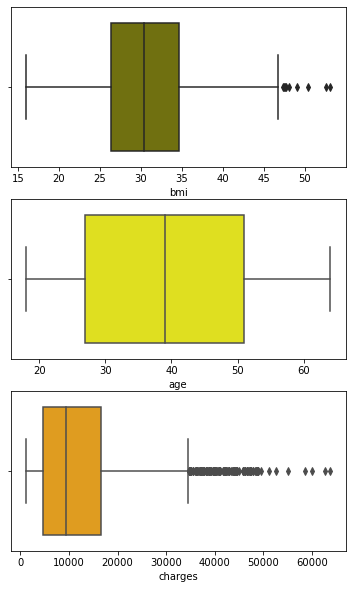

In [9]:
plt.figure(figsize= (6,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='olive')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='yellow')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='orange')

plt.show()

1.The Box plot for bmi has very few outliers

2.The box plot for charge has realatively more number of outliers

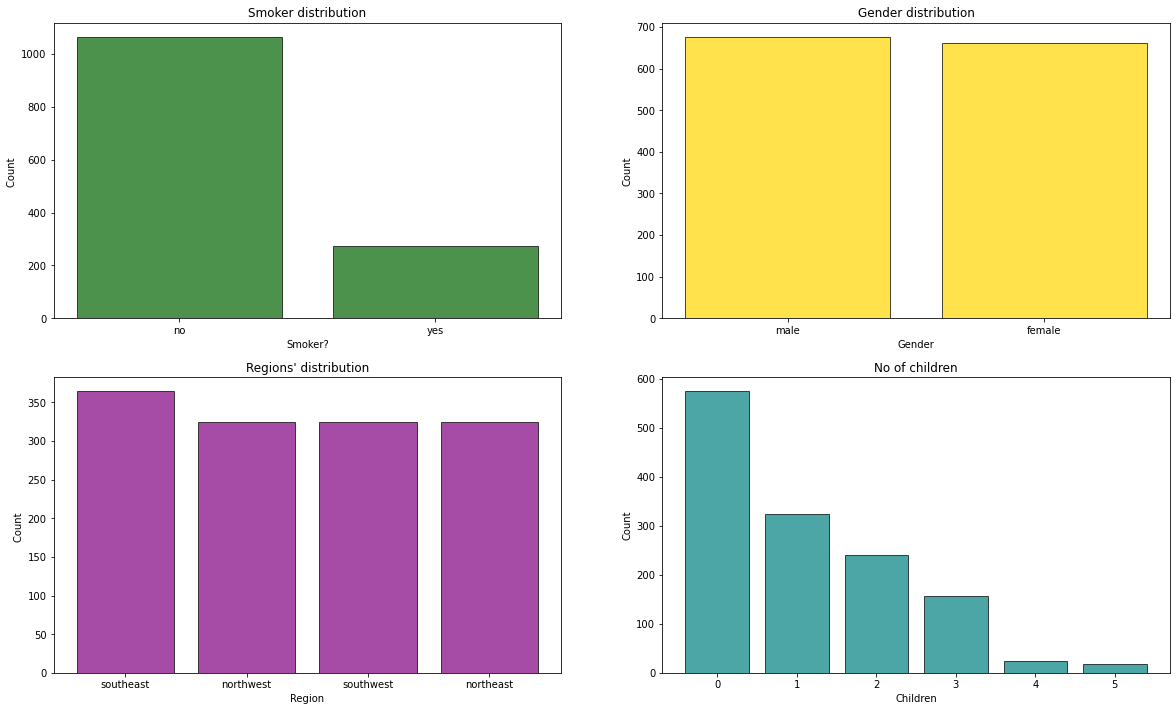

In [10]:
plt.figure(figsize=(20,25))

x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'darkgreen',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')
x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'gold',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'purple',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'teal',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('No of children')

plt.show()

1.The Smokers chart indicates that there are more number of non-smokers than smokers

2.The Gender chart shows that the distribution is even

3.The Region chart shows that the instances are evenly distributed across all regions

4.The Children chart shows that the majority have less than 2 children and very few have 4 or 5 children

C:\Users\FLEMY\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


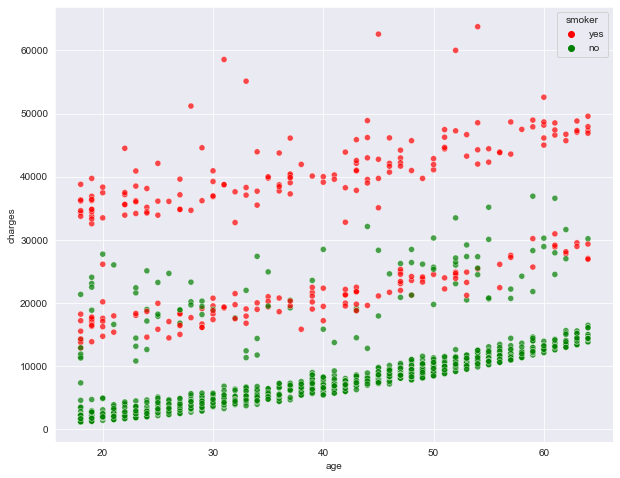

In [11]:
#Scatter plot to look for dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.7)
plt.show()

Its apparent vishually that the smokers have more charges than the non-smokers

C:\Users\FLEMY\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


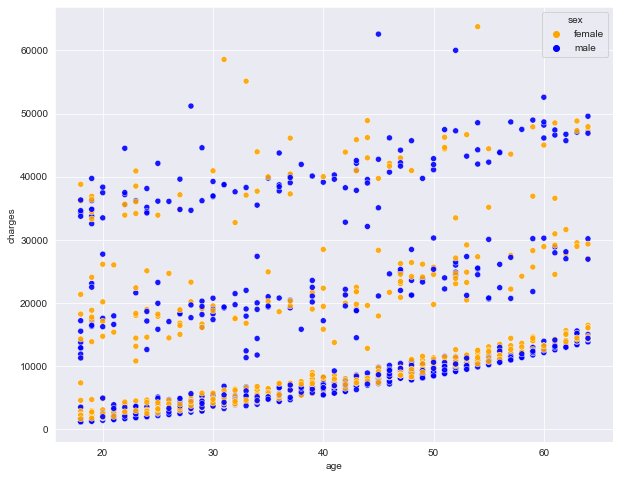

In [12]:
#Scatter plot to look for dependency between attributes Gender and charges accross different ages
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['orange','blue'],alpha=0.9 )
plt.show()

It is apparent that gender has no considerable effect on the charges however higher age groups seem to have relatively higher charges.

C:\Users\FLEMY\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


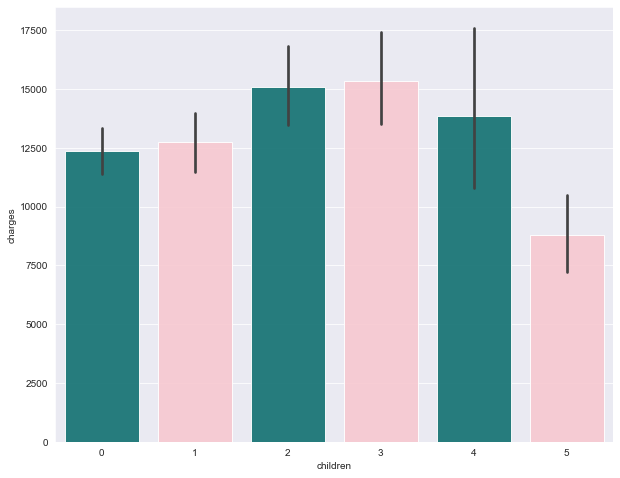

In [13]:
#Barplot to look for dependency between attributes number of children and charges 
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(df.children, df.charges,palette= ['teal','pink'],alpha=0.9 )
plt.show()

It could be inffered that customers with 2 and 3 children have higher chargers

C:\Users\FLEMY\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


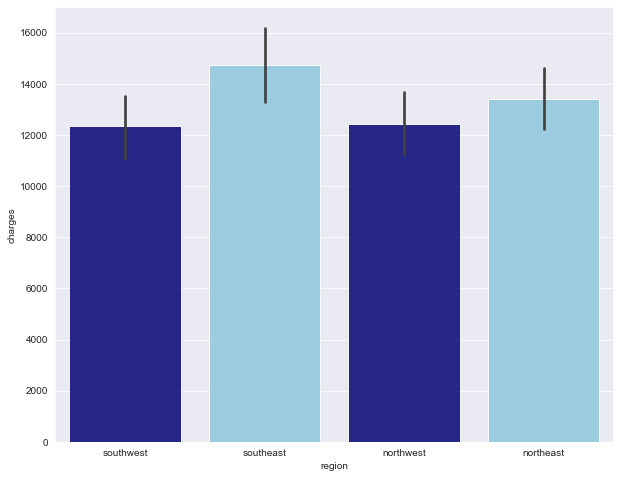

In [14]:
#Barplot to look for dependency between attributes region and charges 
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(df.region, df.charges,palette= ['darkblue','skyblue'],alpha=0.9 )
plt.show()

Customers in the southeast region tend to pay more for insurance

<AxesSubplot:xlabel='No of children'>

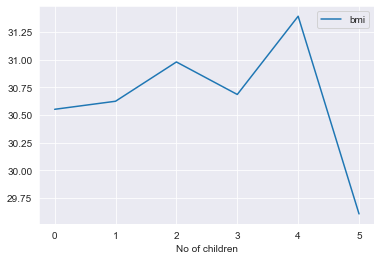

In [15]:
#line plot to find relation btw bmi and number of children
df[["bmi","children"]].groupby(["children"]).mean().plot(kind='line',grid=True,xlabel='No of children')

customers with 4 children had high bmi

# Data Cleaning

In [16]:
cols=['bmi','charges']

In [17]:
#Function for Detecting and removing Outliers
for i in cols:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    lowerfence=q1-1.5*IQR
    upperfence=q3+1.5*IQR
    df2 = df[(df[i]<lowerfence) | (df[i]>upperfence)]
    print(i,df2.shape[0])

bmi 9
charges 139


The number of outliers are considerably low with percentages of 0.006% for bmi and 0.1% for charges respectively hence removal not necessary

# Dimensionality Reduction

<AxesSubplot:>

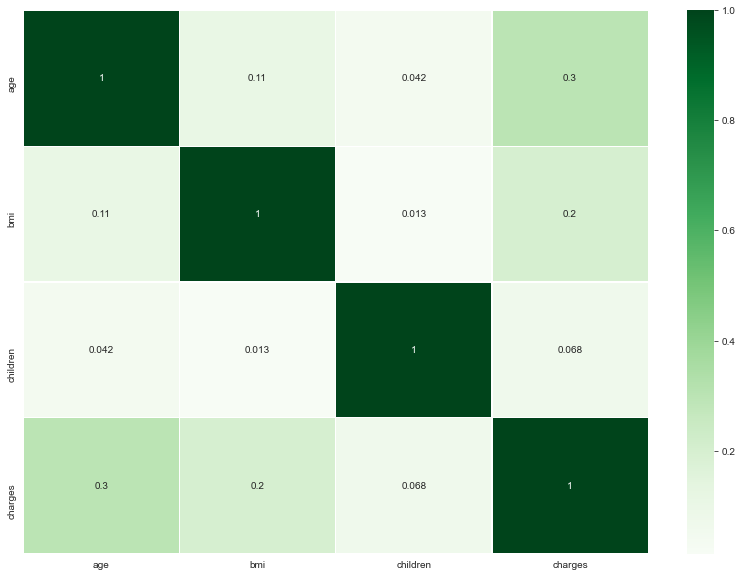

In [18]:
#Checking for correlation
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,cmap="Greens")

Dimensionality reduction not required as the values are all less than 0.5 indicatingweak correlation

# Data Transformation

In [19]:
cols=['sex','smoker','region']
for i in cols:
    df[i]=df[i].astype('category')

In [20]:
df.tail()#Before Transformation

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [21]:
for i in cols:
    df[i]=df[i].cat.codes

In [22]:
df.head()#After Transformation

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [23]:
#storing the cleaned data seperately
df.to_csv("C:\\Users\\FLEMY\\Desktop\\Xaviers\\SemII\\Enabling Technologies (Practical)\\Clean_clust.csv")

# Clustering Algorithms

In [24]:
x=df.iloc[:,[2,6]].values # Using bmi and charges

In [25]:
from sklearn.preprocessing import StandardScaler
#Sclaing the data to make mean = 0 and  unit variance i.e make the data follow standarnd normal distribution
sc=StandardScaler()
x=sc.fit_transform(x)

## 1.K-Means Clustering

In [26]:
wcss_list=[]

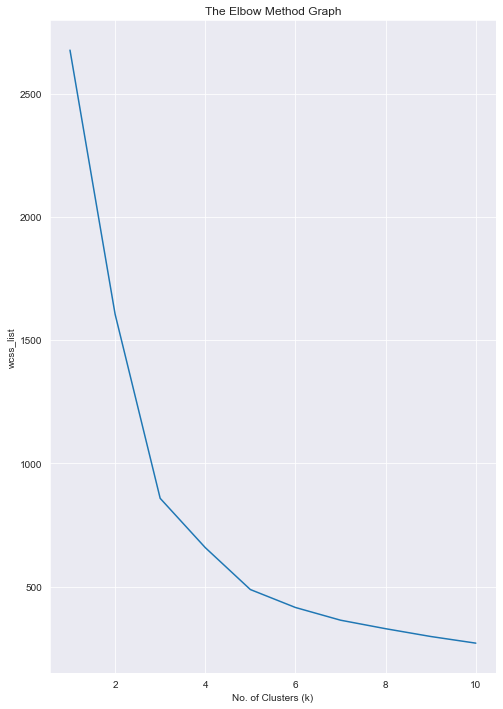

In [27]:
plt.figure(figsize=(8,12))
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.title("The Elbow Method Graph")
plt.xlabel("No. of Clusters (k)")
plt.ylabel("wcss_list")
plt.show()

On extrapolating the bends(elbows) of the graph between 2-4 and 4-6 we observe that no of clusters lie near the value 3

In [28]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_pred=kmeans.fit_predict(x)

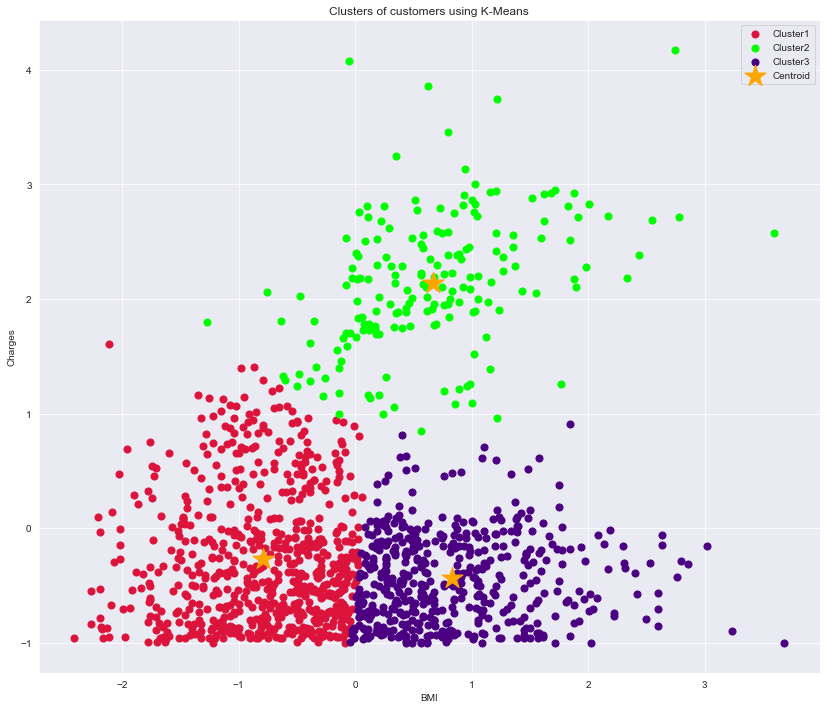

In [29]:
plt.figure(figsize=(14,12))
plt.scatter(x[y_pred ==0,0],x[y_pred == 0,1],s=50,c='crimson',label="Cluster1")
plt.scatter(x[y_pred ==1,0],x[y_pred == 1,1],s=50,c='lime',label="Cluster2")
plt.scatter(x[y_pred ==2,0],x[y_pred == 2,1],s=50,c='indigo',label="Cluster3")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=500,c='orange',marker='*',label="Centroid")
plt.title("Clusters of customers using K-Means")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

From the above graph we can conclude that a majority of customers with high bmi had high charges for the insurance.

The diffrences among the various clusters are clearly visible with more points in the 'red' zone signifying that customers with relatively normal bmi's paid low charges.

## 2. Complete Link Agglomerartive Clustering

In [30]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

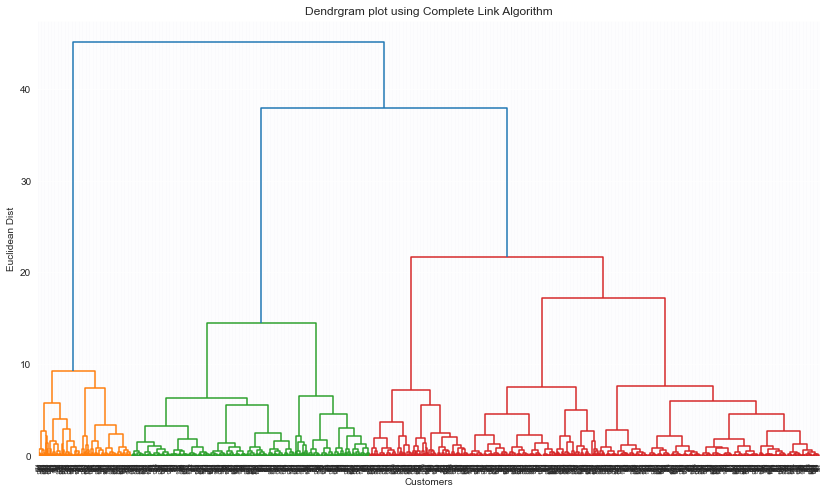

In [31]:
plt.figure(figsize=(14,8))
dendro=shc.dendrogram(shc.linkage(x,method='ward'))
plt.title("Dendrgram plot using Complete Link Algorithm")
plt.ylabel("Euclidean Dist")
plt.xlabel("Customers")
plt.show()

In [32]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward') #fitting the model

In [33]:
y_pred=hc.fit_predict(x)

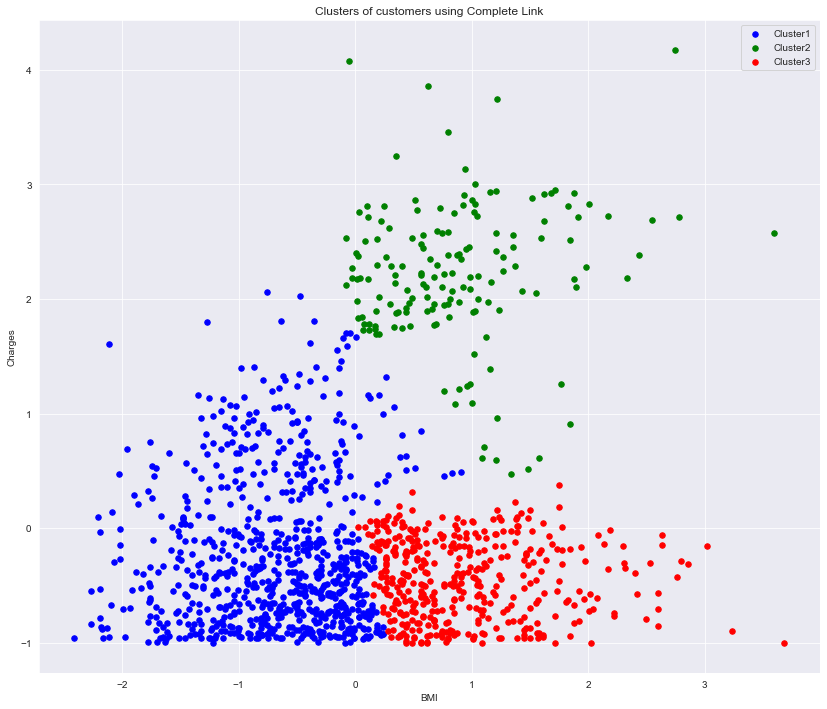

In [34]:
plt.figure(figsize=(14,12))
plt.scatter(x[y_pred ==0,0],x[y_pred == 0,1],s=30,c='blue',label="Cluster1")
plt.scatter(x[y_pred ==1,0],x[y_pred == 1,1],s=30,c='green',label="Cluster2")
plt.scatter(x[y_pred ==2,0],x[y_pred == 2,1],s=30,c='red',label="Cluster3")
plt.title("Clusters of customers using Complete Link")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

The clusters using the complete link algorithm and are well defined without much overlaps among the clusters.

The major datapoints lie in the Cluster1 or blue cluster

## 3. Average Link Agglomerative Clustering

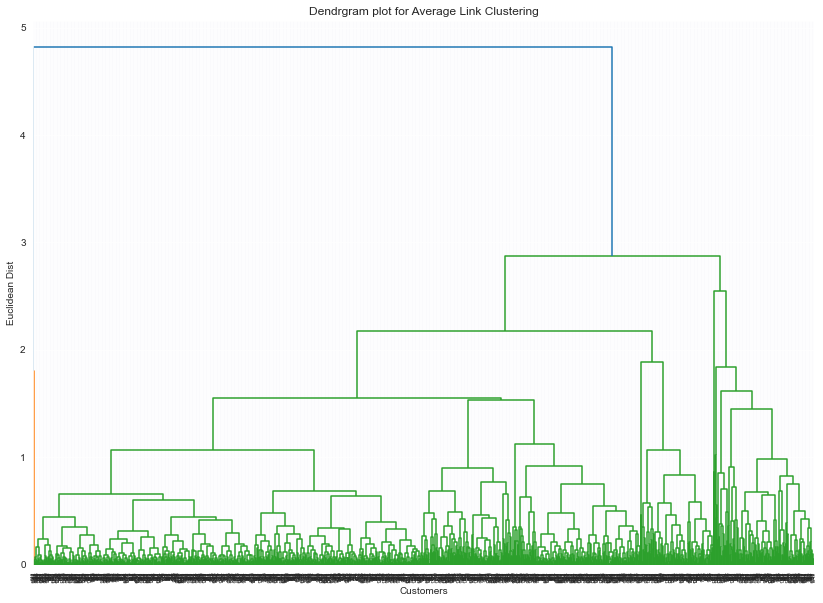

In [35]:
plt.figure(figsize=(14,10))
dendro_avg=shc.dendrogram(shc.linkage(x,method='average'))
plt.title("Dendrgram plot for Average Link Clustering")
plt.ylabel("Euclidean Dist")
plt.xlabel("Customers")
plt.show()

In [36]:
hc_avg=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')

In [37]:
y_pred_avg=hc_avg.fit_predict(x)

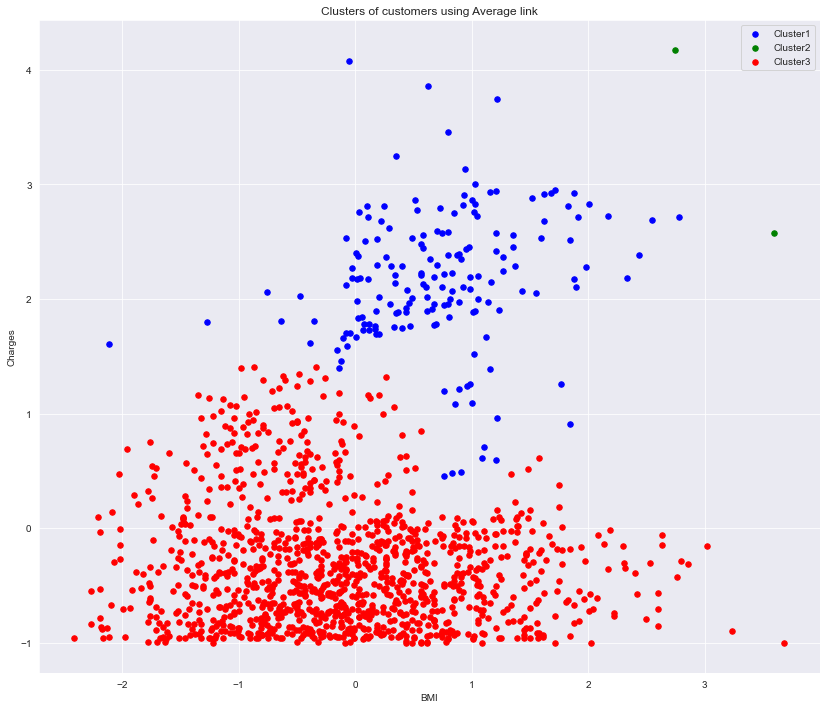

In [38]:
plt.figure(figsize=(14,12))
plt.scatter(x[y_pred_avg ==0,0],x[y_pred_avg == 0,1],s=30,c='blue',label="Cluster1")
plt.scatter(x[y_pred_avg ==1,0],x[y_pred_avg == 1,1],s=30,c='green',label="Cluster2")
plt.scatter(x[y_pred_avg ==2,0],x[y_pred_avg == 2,1],s=30,c='red',label="Cluster3")
plt.title("Clusters of customers using Average link")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

The average link clustering seem to be grouping into 2 clusters.
shows 3 clusters ,however the distribution seems uneven and cluster 2 seems to too few elements as compared to the other clusters .

## 4. Single Link Agglomerative Clustering

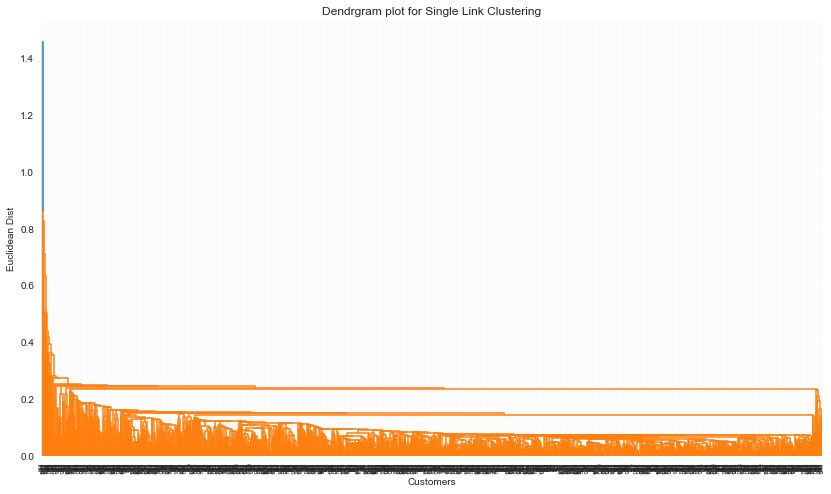

In [39]:
plt.figure(figsize=(14,8))
dendro_single=shc.dendrogram(shc.linkage(x,method='single'))
plt.title("Dendrgram plot for Single Link Clustering")
plt.ylabel("Euclidean Dist")
plt.xlabel("Customers")
plt.show()

In [40]:
hc_single=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [41]:
y_pred_sing=hc_single.fit_predict(x)

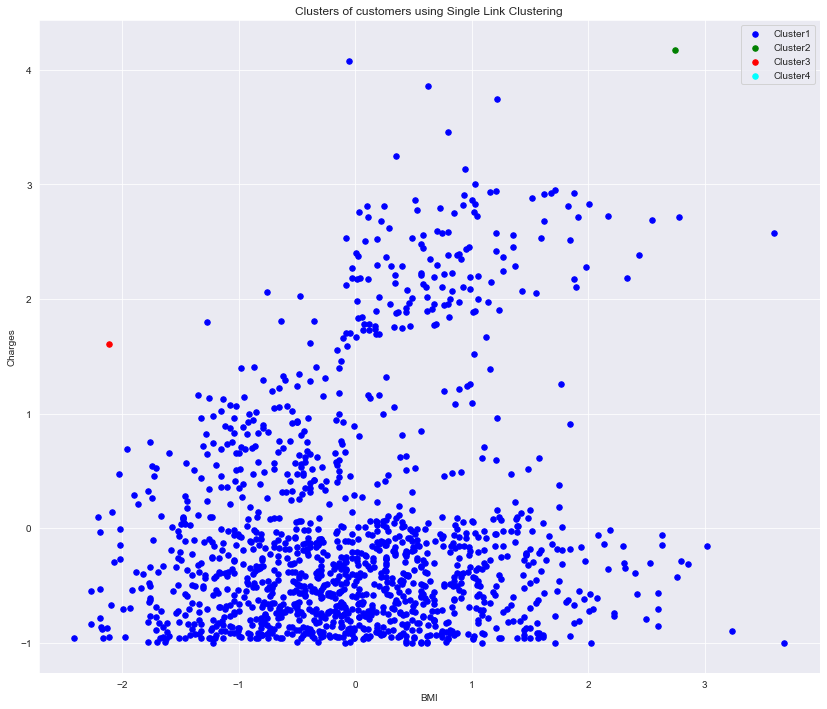

In [42]:
plt.figure(figsize=(14,12))
plt.scatter(x[y_pred_sing ==0,0],x[y_pred_sing == 0,1],s=30,c='blue',label="Cluster1")
plt.scatter(x[y_pred_sing ==1,0],x[y_pred_sing == 1,1],s=30,c='green',label="Cluster2")
plt.scatter(x[y_pred_sing ==2,0],x[y_pred_sing == 2,1],s=30,c='red',label="Cluster3")
plt.scatter(x[y_pred_sing ==3,0],x[y_pred_sing == 3,1],s=30,c='cyan',label="Cluster4")
plt.title("Clusters of customers using Single Link Clustering")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

The single link clustering seem to be grouping all the datapoints in one single cluster which is not desirable 

# Conclusion

The most suitable clustering algorithm for the above dataset is either K-Means or Complete Link where inferences can be easily made and the groups can be easily seperated to form inferences.In this case , it is evident that customers with high BMI have to pay higher charges for their insurance.